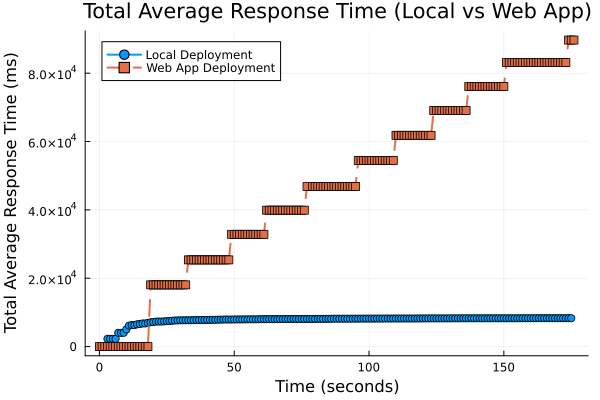

In [5]:
using CSV, DataFrames, Plots

# Load the data for both sources
data_local = CSV.read("logs/locust_log-local-u10r2t3.csv_stats_history.csv", DataFrame)
data_webapp = CSV.read("logs/locust_log-webapp-u10r2t3.csv_stats_history.csv", DataFrame)

# Convert timestamps from Unix time to seconds relative to the start of the test
timestamps_local = data_local.Timestamp .- minimum(data_local.Timestamp)
timestamps_webapp = data_webapp.Timestamp .- minimum(data_webapp.Timestamp)

# Extract Total Average Response Time for both sources
avg_response_time_local = data_local."Total Average Response Time"
avg_response_time_webapp = data_webapp."Total Average Response Time"

# Plot Total Average Response Time for Local Deployment
plot(
    timestamps_local, 
    avg_response_time_local,
    xlabel="Time (seconds)", 
    ylabel="Total Average Response Time (ms)", 
    title="Total Average Response Time (Local vs Web App)", 
    label="Local Deployment", 
    lw=2, 
    marker=:circle, 
    grid=true
)

# Add Total Average Response Time for Web App Deployment
plot!(
    timestamps_webapp, 
    avg_response_time_webapp,
    label="Web App Deployment", 
    lw=2, 
    marker=:square, 
    linestyle=:dash
)